<a href="https://colab.research.google.com/github/PurvaChiniya/AI-Driving-Car/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the libraries and dataset

In [0]:
import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2
from keras import backend as K
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import tensorflow
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16


import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
import os


In [13]:
from google.colab import drive
drive.mount('/content/drive')
zipfile='/content/drive/My Drive/proposal/ILSVRC2012_img_val.zip'
from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/proposal/ILSVRC2012_img_val.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
 #   zipObj.extractall()
   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd '/content/drive/My Drive/proposal'

/content/drive/My Drive/proposal


In [0]:

path='/content/drive/My Drive/proposal/ILSVRC2012_img_val'
PathArray=np.array(natsorted([os.path.join(root, file) for root, dirs, files in os.walk(path) for file in files]))

In [16]:
cd '/content/drive/My Drive/proposal/ILSVRC2012_img_val'

/content/drive/My Drive/proposal/ILSVRC2012_img_val


In [17]:


print("no of images in the dataset are:", len(PathArray),"")
WordList = np.array([os.path.basename(i).split('_')[-1][:-4] for i in PathArray])
X=PathArray[:int(len(PathArray)*0.1)]
Y=WordList[:int(len(PathArray)*0.1)]
print(X.shape)

no of images in the dataset are: 50000 
(5000,)


PREPROCESSING OF THE DATASET

In [20]:
X_val = np.zeros((len(X), 224, 224, 3), dtype=np.float32)
def humansize(nbytes):
    '''From https://stackoverflow.com/questions/14996453/python-libraries-to-calculate-human-readable-filesize-from-bytes'''
    suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])
print(humansize(X_val.nbytes))

2.8 GB


Create  a numpy array for the input images and save it for further use

In [21]:
for i in range(len(X)):
    if i %200 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    
    # Crop
    height, width, _ = img.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    img = img[starty:starty+224,startx:startx+224]
    assert img.shape[0] == 224 and img.shape[1] == 224, (img.shape, height, width)
    
    # Save (as RGB)
    X_val[i,:,:,:] = img[:,:,::-1]

0/5000
200/5000
400/5000
600/5000
800/5000
1000/5000
1200/5000
1400/5000
1600/5000
1800/5000
2000/5000
2200/5000
2400/5000
2600/5000
2800/5000
3000/5000
3200/5000
3400/5000
3600/5000
3800/5000
4000/5000
4200/5000
4400/5000
4600/5000
4800/5000


In [23]:
%%time

np.save("/content/drive/My Drive/proposal/X_val.npy", X_val)

CPU times: user 95.5 ms, sys: 2.16 s, total: 2.25 s
Wall time: 22.8 s


from "https://github.com/calebrob6/imagenet_validation/blob/master/2.%20Benchmark%20Keras%20pretrained%20models%20on%20ImageNet.ipynb?fbclid=IwAR06fSGVLTEmbaG1U5ii7kwd1PySFkVz8nrAczPT19vMi06Fhob-Ap1TFM4"


In [0]:
#mapping between different data types
meta = scipy.io.loadmat("/content/drive/My Drive/proposal/meta.mat")
original_idx_to_synset = {}
synset_to_name = {}

for i in range(1000):
    ilsvrc2012_id = int(meta["synsets"][i,0][0][0][0])
    synset = meta["synsets"][i,0][1][0]
    name = meta["synsets"][i,0][2][0]
    original_idx_to_synset[ilsvrc2012_id] = synset
    synset_to_name[synset] = name

synset_to_keras_idx = {}
keras_idx_to_name = {}
f = open("/content/drive/My Drive/proposal/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    synset_to_keras_idx[parts[0]] = idx
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

def convert_original_idx_to_keras_idx(idx):
    return synset_to_keras_idx[original_idx_to_synset[idx]]

#from "https://github.com/calebrob6/imagenet_validation/blob/master/2.%20Benchmark%20Keras%20pretrained%20models%20on%20ImageNet.ipynb?fbclid=IwAR06fSGVLTEmbaG1U5ii7kwd1PySFkVz8nrAczPT19vMi06Fhob-Ap1TFM4"
  

In [0]:
f = open("/content/drive/My Drive/proposal/ILSVRC2012_validation_ground_truth.txt","r")
Y_val = f.read().strip().split("\n")
Y_val = list(map(int, Y_val))
Y_val = np.array([convert_original_idx_to_keras_idx(idx) for idx in Y_val])
f.close()

In [0]:
np.save("/content/drive/My Drive/proposal/Y_val.npy", Y_val)

In [0]:
keras_idx_to_name = {}
f = open("/content/drive/My Drive/proposal/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

DISPLAY THE ORIGINAL  IMAGES 

Sample images can be seen from x_val and their corressponding labels are obtained as::


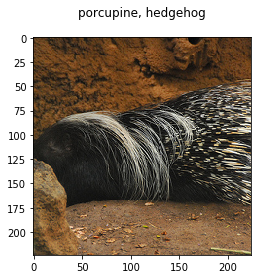

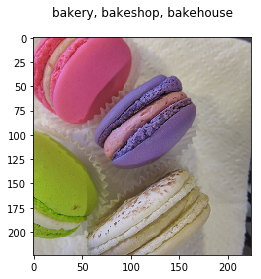

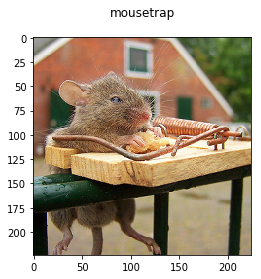

In [30]:
print("Sample images can be seen from x_val and their corressponding labels are obtained as::")
for i in range(6,9):
    plt.figure()
    plt.imshow(X_val[i] / 255.0)
    plt.title(keras_idx_to_name[Y_val[i]])
    plt.show()
    plt.close()